# Тероризмът около нас
#####  Сега ще разгледаме тероризма в днешно време и покажем някои интересни статистики за тях. Използваме тези данни от kaggle - https://www.kaggle.com/START-UMD/gtd. Проекта ще бъде разделен на две основни части. В първата част ще разгледаме малко по-подробно данните и ще представим някои интересни факти чрез графики. Втората част съдържа създаване на модел, който преценя дали има жертви от даден терористичен акт. 

#### Преди всичко нека дадем определение за тероризъм. Въпреки, че липсват дефиниции, установени с международни договори, налице са научни определения за тероризъм. Като тероризъм се разбират насилие и акции на насилие (като напр. отвличания, атентати, удари с взривни вещества) срещу политическия ред, за да се постигне политическа промяна. Терорът служи като средство за натиск и преди всичко трябва да разпространи несигурност или страх или да създаде симпатия или готовност за подкрепа.

### 1. Данните, с които разполагаме
Нека първо разгледаме отгоре нашиите данни. Разполагаме с над 180 000 терористични акта за периода 1970-2017. Данните имат над 150 колони,които дават различна информация. Повече подробности за всяка една колона можем да намерим в официалния саит https://www.start.umd.edu/gtd/downloads/Codebook.pdf. Имаме доста различни категории за информация като местополжение, извършители, пострадали, вид на терористичния акт и други. Нека разгледаме някои от по основните:




'iyear' - През коя година е извършен акта.

'success', - Успешен ли е бил.

'claimed', - Има ли някой, който да е поел отговорност за случилото се.

'ishostkid', - Дали е имало заложници или отвлечени по време на инцидента.

 'country_txt', - Име на държавата, в която се е случил терористичния акт.
 
'attacktype1_txt', - Текстово поле с това от какъв вид е била атаката - пример: Отвличане, Политическо убииство, бомбандиране и др.

'targtype1_txt' - Текстово поле с това от какъв тип е жертвата - пример: Бизнесмен, Полицаи, Политик и др.

,'weaptype1_txt' - Какъв вид оръжие е използвано за извършване на терористичния акт.  

 'gname' - Организацията отговорна за инцидента.

И още много други, които ще разгледаме малко по-долу в проекта

### 2.1 Визуализация на данните

Нека сега да покажем малко интересни факти, използваики всичката тази информация за терористичните актове
Първо ще заредим данните и някои библиотеки.

In [161]:
import sys

import sklearn
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.options.mode.chained_assignment = None
%matplotlib inline

In [162]:
data = pd.read_csv('data/globalterrorismdb_0718dist.csv', low_memory = False, encoding = "ISO-8859-1")

Като за начало да разгледаме всички терористични актове в периода и жертвите през годините.

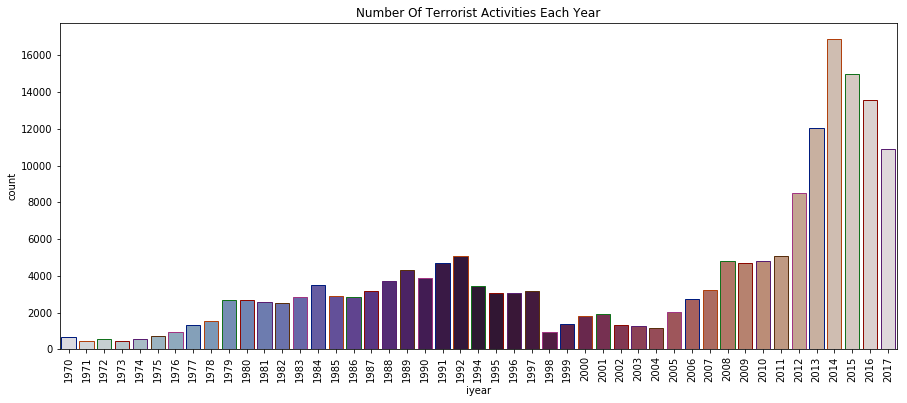

In [163]:
data['casualties'] = data.nkill + data.nwound
plt.subplots(figsize=(15,6))
sns.countplot('iyear',data=data,palette='twilight',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()


Няма как да не забележим, че през последните години тероризма по света се е увеличил доста. Това наи-вероятно е в следствие от новите политически идеи на страните и войната за власт.

Нека покажем и всички жертви на тероризъм в периода.

In [164]:
data['casualties'].sum(axis=0)

872892.0

Сега да видим, в кои странни забелязваме наи-много случаи на тероризъм.

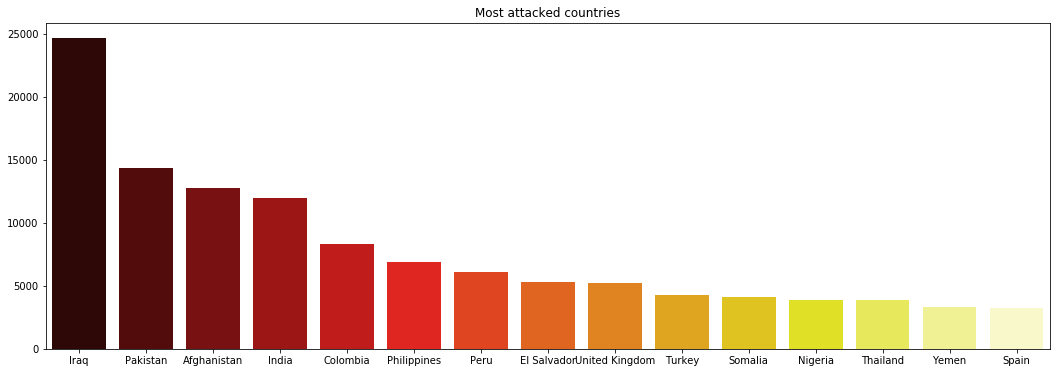

In [165]:
plt.subplots(figsize=(18,6))
sns.barplot(data['country_txt'].value_counts()[:15].index,data['country_txt'].value_counts()[:15].values,palette='hot')
plt.title('Most attacked countries')
plt.show()

Първите места се държат от предимно мюсюлмански държави, които са много добре известни с военните положения и гражданските войни в тях.



Следва да покажем и кои са избраните цели на атакуващите.

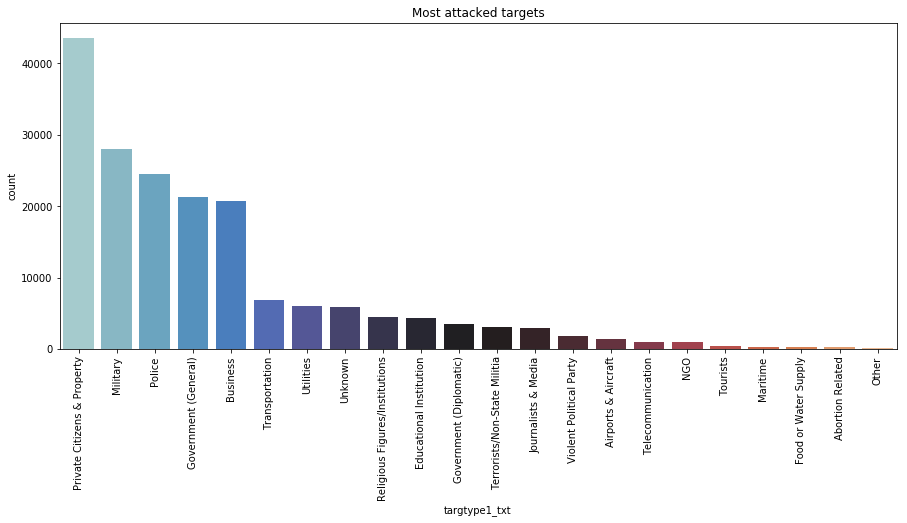

In [166]:
plt.subplots(figsize=(15,6))
sns.countplot(data['targtype1_txt'],palette='icefire',order=data['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Most attacked targets')
plt.show()

Разпределението е логично, като основно нападателите се целят в хора и сгради с важно значение - било то политическо или военно.

И сега какви атаки са сред препочитаните от терористите.

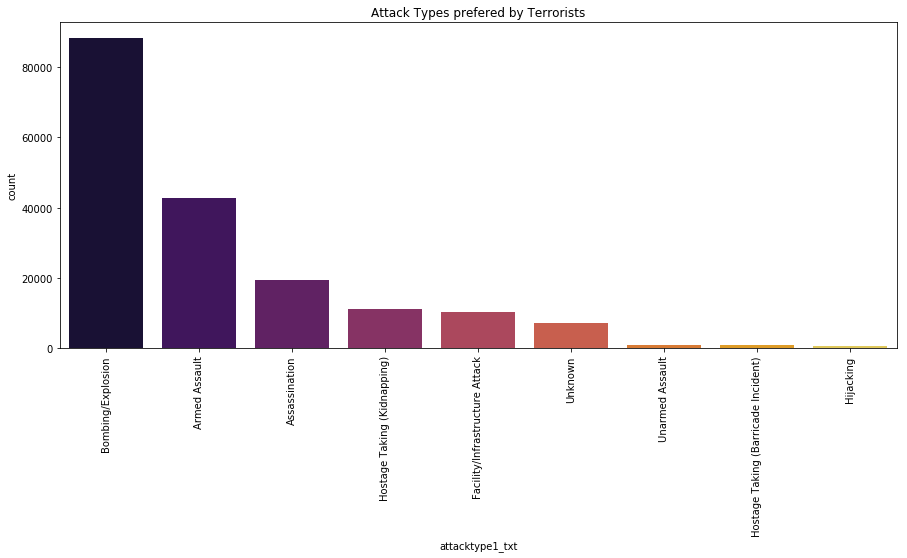

In [167]:
plt.subplots(figsize=(15,6))
sns.countplot('attacktype1_txt',data=data,palette='inferno',order=data['attacktype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attack Types prefered by Terrorists')
plt.show()


Разбира се, основно те се спират на бомбандиране тъй като броят на жертвите лесно може да стане доста голям. Не липсват обаче и атаки с различни методи и типове.

И за последно наблюдение ще оставим най-активните групировки през годините.

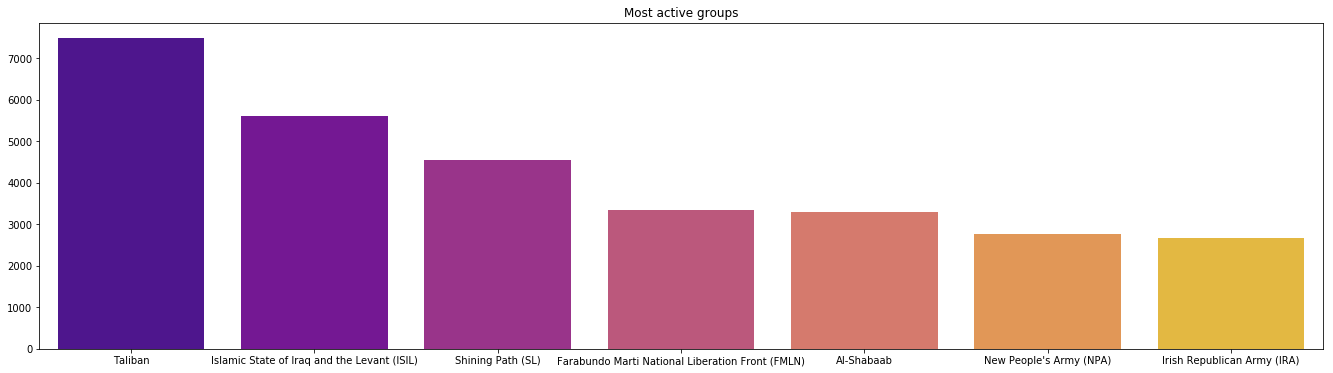

In [168]:
plt.subplots(figsize=(23,6))
sns.barplot(data['gname'].value_counts()[1:8].index,data['gname'].value_counts()[1:8].values,palette='plasma')
plt.title('Most active groups')
plt.show()

Наи-често атаките са извършвани от ислямистки групировки с радикални идеи. Всички помним техните действия дори на територията на континента ни.

#### Разгледахме няколко интересни статистики за терористичните актове в периода 1970 - 2017. Нека сега да преминем кум създаването на модел дали има жертви от даден терористичен акт.

### 2.2 Използване на данните

Преди всичко зареждаме данните и оставяме тези колони с информация, за които смятаме че са най-важни и премахваме тези които не носят информация.

In [169]:
data = pd.read_csv('data/globalterrorismdb_0718dist.csv', low_memory = False, encoding = "ISO-8859-1")
data_columns = ['iyear', 'imonth', 'iday','extended', 'vicinity', 'crit1', 'crit2', 'crit3', 'doubtterr',
                'multiple', 'success', 'suicide', 'guncertain1','claimed', 'property', 'ishostkid','nkill', 'nwound',
                'country_txt', 'region_txt', 'attacktype1_txt', 'targtype1_txt', 'natlty1_txt', 'weaptype1_txt',
                'gname']
data = data.loc[:, data_columns]

За да специфицираме модела, ще оставим само тези случеи през годините, за които няма съмнение че са терористичен акт и отговарят точно на 3 критерия. А те са :

-Политическа, икономическа, религиозна или социална атака

-Намерение да стресне или извести атаката до масовата общност

-Акта е извън световния хуманитарен закон (повече за него - https://en.wikipedia.org/wiki/International_humanitarian_law) 

In [170]:
data = data[(data.crit1 == 1) & (data.crit2 == 1) & (data.crit3 == 1) & (data.doubtterr == 0)]

Забелязваме някои странни неща в данните и ще ги оправим.

In [171]:
data.iloc[:,[6, 15, 16, 17]] = data.iloc[:,[6, 15, 16, 17]].replace(-9,0)

В таблицата за това дали за акта е била поета отговорност имаме стоиности 2, които най-вероятно значат да.

In [172]:
data.claimed.replace(2,1, inplace = True)

Нека разгледаме имаме ли "null" стоиности в данните.

In [173]:
data.isnull().sum()

iyear                  0
imonth                 0
iday                   0
extended               0
vicinity               0
crit1                  0
crit2                  0
crit3                  0
doubtterr              0
multiple               1
success                0
suicide                0
guncertain1          253
claimed            42056
property               0
ishostkid            161
nkill               6768
nwound             10954
country_txt            0
region_txt             0
attacktype1_txt        0
targtype1_txt          0
natlty1_txt         1324
weaptype1_txt          0
gname                  0
dtype: int64

Липсващите стоиности в колоните: "guncertain1", "ishostkid", "multiple" и "natlty1" не са толкова много и може да ги занулим.


In [174]:
data.guncertain1.fillna(0, inplace = True)
data.ishostkid.fillna(0, inplace = True)
data.multiple.fillna(0, inplace = True)
data['natlty1_txt'].fillna('unknown', inplace = True)

Нещата стоят по малко по-друг начин за "nwound" и "nkill". Доста стойности липсват затова нека ги запълним със средното за данните.

In [175]:
data.nkill = np.round(data.nkill.fillna(data.nkill.median())).astype(int) 
data.nwound = np.round(data.nwound.fillna(data.nwound.median())).astype(int)


Нека създадем нова колона, която ще се опитваме да предскажем, отговаряща за това дали има жертви от даден терористичен акт.

In [176]:
data['casualties'] = data.nwound + data.nkill

За да получим бинарен резултат да или не ще приложим функция върху категорията.

In [177]:
data['casualties'] = data.casualties.apply(lambda x: 0 if x == 0 else 1)

Да видим какво остана да запълним.

In [193]:
print ('missing data : \n')
print (data.isnull().sum().sort_values(ascending = False).head(4))

missing data : 

claimed       43268
casualties        0
suicide           0
imonth            0
dtype: int64


Тъй като в "claimed" имаме доста празни стоиности може да направим модел, които да ги запълни.

Щом имаме текстови полета в колоните, трябва да намерим начин да ги превърнем в цифри. За тази цел ще добавим нови колони за всеки уникален текст за всяка текстова колона, която представлява бинарен вектор. Забелязваме че в доста текстови колони имаме стойността "Unknown". Това ще е проблем ако искаме да добавим нови колони, защото няма да знаем коя колона за коя категория отговаря. Нека преди всичко променим "Unknown" стойностите на "Unknown_x" където x е типа.

In [194]:
data['attacktype1_txt'] = data['attacktype1_txt'].replace('Unknown', 'Unknown_attacktype1')
data['targtype1_txt'] = data['targtype1_txt'].replace('Unknown', 'Unknown_targtype1')
data['weaptype1_txt'] = data['weaptype1_txt'].replace('Unkown', 'Unknown_weaptype1')
data['gname'] = data['gname'].replace('Unknown', 'Unknown_gname')
data['weaptype1_txt'] = data['weaptype1_txt'].replace('Other', 'Other_weaptype1')

Има доста стойности в "claimed" със стоиност -9. Нека ги затрием и да предсказваме тях също.

In [195]:
data['claimed'] = data['claimed'].replace({-9: np.nan})

Нека вземем само категорията, която ще предсказваме.

In [196]:
y_temp = data.claimed
y_temp.shape

(138879,)

Добавяме новите колони, с които ще кодираме текстовите полета.

In [197]:
df = data
one_hot = pd.get_dummies(df['country_txt'])
df = df.drop(['country_txt'],axis = 1)
df = df.join(one_hot)
one_hot = pd.get_dummies(df['region_txt'])
df = df.drop(['region_txt'],axis = 1)
df = df.join(one_hot)
one_hot = pd.get_dummies(df['attacktype1_txt'])
df = df.drop(['attacktype1_txt'],axis = 1)
df = df.join(one_hot)
one_hot = pd.get_dummies(df['targtype1_txt'])
df = df.drop(['targtype1_txt'],axis = 1)
df = df.join(one_hot)
one_hot = pd.get_dummies(df['weaptype1_txt'])
df = df.drop(['weaptype1_txt'],axis = 1)
df = df.join(one_hot)
df = df.drop(['gname','natlty1_txt'], axis = 1)

Разделяме данните на тези, които имат като стойности "claimed".Върху тях ще се учим и ще предсказваме остатъка.

In [198]:
y_temp = df.claimed
x_train = df[~y_temp.isnull()]
y_train = y_temp[~y_temp.isnull()]
X_test = df[y_temp.isnull()]
x_train.shape, y_train.shape, df.shape, X_test.shape

((95611, 276), (95611,), (138879, 276), (43268, 276))

Използваме логистична регресия и прилагаме резултата върху празните места.

In [199]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 42,solver='liblinear').fit(x_train, y_train)
X_test.fillna(0, inplace = True)
predictions = pd.Series(lr.predict(X_test), index = X_test.index)

df.claimed.fillna(predictions, inplace = True)

Нека сега опитаме да направим логистична регресия за новата колона "casualties".

In [200]:
from sklearn.model_selection import train_test_split

train_no_casualties = df.drop(labels=['casualties'], axis=1)
train_casualties = df['casualties']

x_train, x_test, y_train, y_test = train_test_split(train_no_casualties, 
                                                    train_casualties, 
                                                    test_size=0.3, 
                                                    random_state=4330)

In [201]:
model = LogisticRegression(solver = 'liblinear')
model.fit(x_train, y_train)  
print("Train: ", model.score(x_train, y_train),"  Test: ", model.score(x_test, y_test))

Train:  1.0   Test:  1.0


Не сме направили уникален модел, който е безпогрешен и никой друг не се е сетил, а просто не сме премахнали двете колони "nkill" и "nwound", с които построихме допълнителната. Е логично е ако разполагаме с тази информация, нашия модел да е безпогрешен. Нека повторим нещата както трqбва.

In [202]:
df = df.drop(['nkill', 'nwound'], axis=1)

In [203]:
train_no_casualties = df.drop(labels=['casualties'], axis=1)
train_casualties = df['casualties']

x_train, x_test, y_train, y_test = train_test_split(train_no_casualties, 
                                                    train_casualties, 
                                                    test_size=0.3, 
                                                    random_state=4330)

In [204]:
model = LogisticRegression(solver = 'liblinear')
model.fit(x_train, y_train)  
print("Train: ", model.score(x_train, y_train))
print("Test: ", model.score(x_test, y_test))

Train:  0.8269505734711722
Test:  0.8229886712749616


Това е по-приемлив резултат, но може да постигнем повече. Нека опитаме да променим малко настройки на регресията.

In [205]:
for c in [0.001, 0.003, 0.006, 0.1, 0.2, 0.4, 1.0, 3.0, 6.0]:
    model = LogisticRegression(C=c, solver = 'liblinear')
    model.fit(x_train, y_train)
    
    print("C={:f} train: {:f} test: {:f}".format(c, model.score(x_train, y_train), model.score(x_test, y_test)))

C=0.001000 train: 0.809752 test: 0.808036
C=0.003000 train: 0.819925 test: 0.816868
C=0.006000 train: 0.822363 test: 0.819148
C=0.100000 train: 0.827887 test: 0.823925
C=0.200000 train: 0.826282 test: 0.822629
C=0.400000 train: 0.826642 test: 0.822941
C=1.000000 train: 0.826951 test: 0.822989
C=3.000000 train: 0.826333 test: 0.822797
C=6.000000 train: 0.826807 test: 0.823013


Наи-добрия резултат получаваме при "c" = 0.1.
C=0.100000 train: 0.827887 test: 0.823925

Нека опитаме сега с малко по-различен алгоритйм.

In [206]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=7777, n_estimators = 10).fit(x_train, y_train)
print("train score:", model.score(x_train, y_train))
print("test score: ", model.score(x_test, y_test))

train score: 0.9846628606696497
test score:  0.845526113671275


Забелqзваме, че нашия модел "overfitting". Нека се опитаме да намерим малко по-подходящи параметри.

In [ ]:
from sklearn.model_selection import GridSearchCV

search = GridSearchCV(cv = 3, model, {'n_estimators': [50, 200],
                              'max_depth': [8, 30]})
search.fit(x_train, y_train)

pd.DataFrame(search.cv_results_)[['rank_test_score', 'mean_test_score', 'params']].sort_values(by='rank_test_score').head(10)



Наи-добър резултат:

In [210]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=7777, max_depth = 30, n_estimators = 200).fit(x_train, y_train)
print("train score:", model.score(x_train, y_train))
print("test score: ", model.score(x_test, y_test))

train score: 0.949452245023916
test score:  0.860071044546851


### 3. Идеи за бъдещо подобрение

1. Моделът ни все още показва малък "overfit". Може и да е възможно да го подобрим.

2. Може да използваме повече колони от всички данни за постигане на по-добри резултати.

3. Имаме колона, която описва с изречения какво е представлявал терористичния акт. Може да използваме по-сложни алгоритми за да извлечем тази информация от самото описание.

### 4. Заключение

Използваики данни за терористични актове за периода 1970-2017 успяхме да представим няколко интересни графики и основни зависимости. Направихме модел, който предсказва дали в даден терористичен акт ще има жертви.
Повече информация за самите данни можете да намерите на официалния сайт: https://www.start.umd.edu/gtd/